# Classification evaluation
Note: This document's purpose is to communicate information via text and charts. The code in here is only for charting; the more complex logic is hidden in Python modules to be found in the same repository.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import evaluate
import merge
import load

In [2]:
# Load classification predictions
predictions = merge.merged_predictions(keep_columns=['articleID', 'productGroup', 'customerID', 'voucherID'])

# Load training set
train = load.orders_train()

Note: You can find the structure of the merged data in the appendix.

## To what extent do the predictions differ?
The figure below shows a comparison for each combination of teams. The cells containt the percentage of rows that have different classifications.

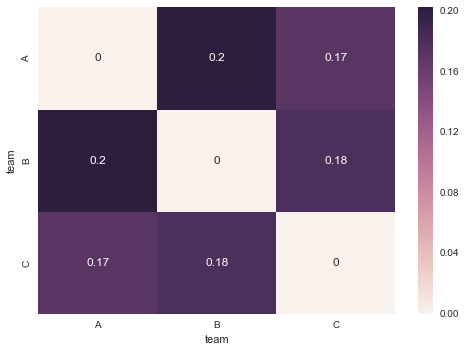

In [3]:
# Calculate difference for each combination
differences = evaluate.distinct_predictions(predictions)

# Heatmap
ax = sns.heatmap(differences, annot=True)

The predictions differ greatly, and they differ greatly between each team. On average, 18% of rows contain different predictions (compare to 14% in the test). Shit.

## How do the predictions differ per split?
The figure below shows these differences seperated into splits. It shows the number of distinct rows for each combination of teams (columns) and each split (rows).

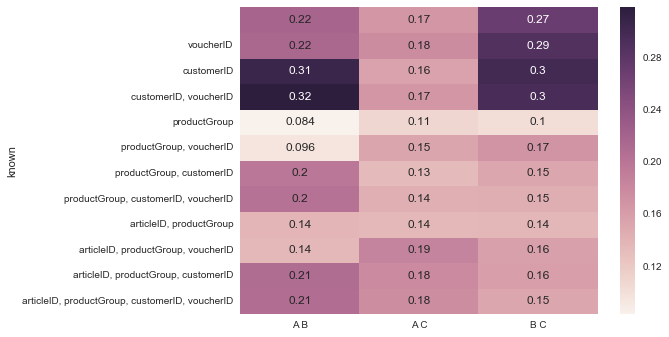

In [4]:
# Calculate differences across splits
differences = evaluate.distinct_split_predictions(train, predictions)

# Heatmap
ax = sns.heatmap(differences, annot=True)

The differences are put in perspective with their relative sizes in the figure below. The top four splits comprise 19% of the entire set and contain up to 32% differing predictions across teams. The bottom 3 splits make up 64% of the set and contain up to 21% differing predictions.

Those two groups each have one team that is off, while the two other agree. A and C go along in the top, B and C in the bottom. This knowledge might be leveraged in a merge approach.

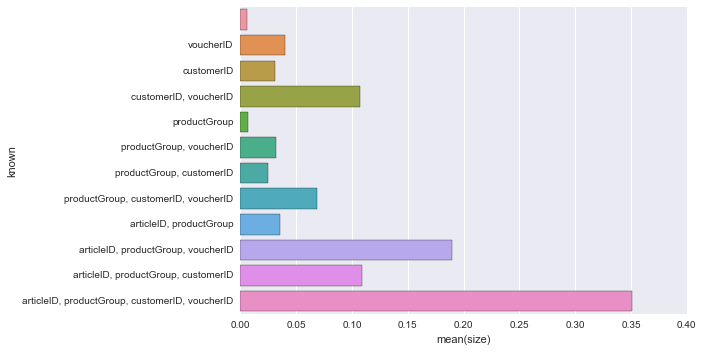

In [5]:
# Calculate size of each split
split_sizes = evaluate.split_sizes(train, predictions['original'])

# Barplot
ax = sns.barplot(x='size', y=split_sizes.index, data=split_sizes)

## How are the classifier confidences distributed?
The figure below shows the distributions of confidence for each team. While confidences showed similar central tendency in the test set, Team A seems to be more confident on average (71% as oppesed to 63% and 65%). Again, ranges are very different, complicating merge approaches based on confidence.

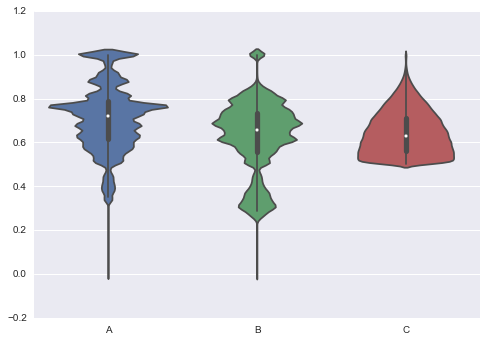

In [6]:
# Violinplot
ax = sns.violinplot(data=predictions['confidence']) # 63, 65, 71

## How confident are the classifieres across splits?

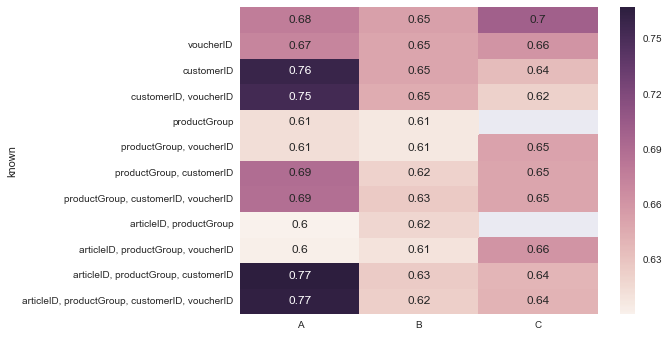

In [7]:
# Calculate the mean confidence across splits for each team
confidences = evaluate.split_mean_confidences(train, predictions)

# Heatmap
ax = sns.heatmap(confidences, annot=True)

(C used different classifiers, not all of them providing confidences; the respective cells are grey.)

B and C seem consistent in their confidence. As in the test set, A's confidence seems to go along with knowledge on *customerID*, despite it having the greatest differences in these splits.

## Appendix
### Prediction data

In [8]:
predictions

confidence                      \
                                               A         B         C   
orderID  articleID colorCode sizeCode                                  
a1744178 i1002632  3097      I          0.673280  0.701320  0.500000   
         i1003278  1097      40         0.730548  0.723813  0.570000   
         i1003279  1114      40         0.730548  0.714540  0.500000   
                   1116      40         0.730548  0.714540  0.620000   
                   1117      40         0.730548  0.714540  0.600000   
a1744179 i1001147  1001      42         0.638791  0.267293  0.595477   
         i1001151  3082      42         0.629993  0.336710  0.628530   
         i1001160  1108      42         0.432883  0.307641  0.580849   
         i1001461  2493      42         0.432883  0.315724  0.559468   
         i1001480  1001      42         0.432883  0.319979  0.523900   
         i1003229  2112      42         0.404722  0.286497  0.516347   
a1744180 i1000477  1001      38         0.813504  0.801953  0.740000   
                             40         0.813504  0.801953  0.790000   
                   1092      38         0.813504  0.801953  0.780000   
                             40         0.813504  0.801953  0.820000   
                   1093      38         0.813504  0.801953  0.780000   
                             40         0.813504  0.801953  0.810000   
         i1002579  1101      A          0.764689  0.695478  0.750000   
         i1002580  1093      I          0.764689  0.700323  0.720000   
                   1117      I          0.764689  0.700323  0.720000   
         i1003237  1092      40         0.764689  0.742278  0.800000   
                   1093      40         0.764689  0.742278  0.810000   
                   1096      40         0.764689  0.742278  0.810000   
         i1003244  1001      38         0.813504  0.808203  0.690000   
                             40         0.813504  0.808203  0.710000   
                   1111      38         0.813504  0.808203  0.710000   
                             40         0.813504  0.808203  0.790000   
a1744181 i1003656  7178      29         0.626984  0.332231  0.590000   
a1744182 i1001153  1096      40         0.613039  0.634327  0.670000   
         i1001155  1112      42         0.613039  0.641684  0.650000   
...                                          ...       ...       ...   
a1855487 i1002643  1108      I          0.547736  0.552732  0.500000   
         i1003944  1082      34         0.696344  0.697340  0.710000   
a1855488 i1003695  7219      31         0.338593  0.511464  0.528049   
         i1004377  10224     30         0.504716  0.502594  0.634781   
a1855489 i1001138  1096      36         0.653909  0.693367       NaN   
         i1002506  1012      38         0.629691  0.637402       NaN   
a1855490 i1003941  1082      44         0.999972  0.842730  0.790000   
a1855491 i1003274  3097      40         0.673966  0.617999  0.560000   
         i1004339  30342     40         0.673966  0.502594  0.510000   
a1855492 i1004338  20197     40         0.617232  0.612314  0.805836   
a1855493 i1001163  1111      38         0.598698  0.631509  0.650000   
a1855494 i1001155  1001      38         0.530298  0.258953  0.650561   
         i1004137  10109     38         0.504716  0.502594  0.664597   
a1855495 i1003660  7211      30         0.999750  0.652364  0.610000   
         i1003956  1113      40         0.852970  0.642034  0.680000   
a1855496 i1004181  10114     40         0.620362  0.683944  0.540000   
         i1004213  10001     40         0.620362  0.683944  0.540000   
         i1004332  10001     40         0.620362  0.683944  0.580000   
         i1004341  10108     40         0.620362  0.683944  0.580000   
         i1004549  20109     A          0.642677  0.683944  0.540000   
a1855497 i1004237  10342     40         0.617232  0.612314  0.995126   
         i1004481  30107     A          0.736484  0.752797  0.996545   
a18554